# Analysis of courses data

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
coursera= pd.read_csv('coursea_data.csv') # loading coursera data

# About Coursera data set

Source of data: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

## Content
This dataset contains mainly 6 columns and 890 course data. The detailed description:

course_title : Contains the course title.
course_organization : It tells which organization is conducting the courses.
course_Certificate_type : It has details about what are the different certifications available in courses.
course_rating : It has the ratings associated with each course.
course_difficulty : It tells about how difficult or what is the level of the course.
course_students_enrolled : It has the number of students that are enrolled in the course.

In [172]:
coursera.head(5) # data preview: 5 first rows

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Data cleaning part

In [173]:
coursera_df = coursera.drop('Unnamed: 0', axis=1) # removing column "Unnamed:0" as unnecassary variable from the set

In [174]:
coursera_df.isnull().sum() #checking if any values are missing 

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [175]:
coursera_df.head(10).duplicated().sum() # checking for duplicates

0

In [176]:
coursera_df.dtypes # data types

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [177]:
# function to change k and m symbol to thousands and millions and make it to float type values
def converter(x: str) -> float:
    if 'k' in x:
        return float(x.replace('k', '')) * 1000
    elif 'm' in x:  
        return float(x.replace('m', '')) * 1000000
    else:
        return float(x)

coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].apply(converter)

In [178]:
coursera_df.head(3) #checking for changes in students enrolled 

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0


In [179]:
coursera_df.dtypes # check for types after changes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled    float64
dtype: object

# Data exploration

In [180]:
coursera_df.describe(include=['object']).T # exploration of object type features

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487


There are 891 courses available in the dataset, and 888 unique course titles. There are some courses with the same title. The course "developing your musicianship" is one them. Necessary to see if there are unspotted dublicated courses. 
Courses come from 154 unique organizations. The organization that appears most frequently is "University of Pennsylvania", that offers 59 courses. 
There are 3 unique categories of certificate types, "COURSE" is the most frequent one and has 582 courses under it. 
There is category of difficulty with 4 different levels. The most frequent difficulty level is "Beginner", which appears 487 times. This suggests that most of the courses are created for beginner students.

In [181]:
duplicate_courses = coursera_df[coursera_df.duplicated(['course_title'], keep=False)] #checking for possibly dublicate courses
duplicate_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000.0
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000.0


In [130]:
coursera_df.describe(include=['float']).T # descriptive statistics of numeric type features

,count,mean,std,min,25%,50%,75%,max
course_rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0
course_students_enrolled,891.0,90552.076319,181936.453852,1500.0,17500.0,42000.0,99500.0,3200000.0


Average course rating is 4.68, showing that on average courses are in quite good per students perspective.
The standard deviation of course ratings is approximately 0.16. I could say that sd is quite low, indicating that the ratings are pretty close to the mean and course ratings do not vary drastically. The minimum course rating is 3.3, while the maximum is 5.0. Quantiles indicate that half of the courses have ratings between 4.6 and 4.8. (see 25% and 75% quantiles)

On average there were 90522 students enrolled. However, the standard deviation is quite high - 181936, which indicates a high varation of the number of students enrolled to course. There is course that had only 1500 students enrolled and there were course that had over million students - 3,2mln. Quantiles evaluation suggests that half of the courses have student enrollments between 17500 and 99500.

In [182]:
# 10 most enrolled courses
pop_courses = coursera_df.sort_values('course_students_enrolled', ascending=False).head(10)
pop_courses[['course_title', 'course_students_enrolled']]

,course_title,course_students_enrolled
564,Machine Learning,3200000.0
815,The Science of Well-Being,2500000.0
688,Python for Everybody,1500000.0
674,Programming for Everybody (Getting Started wit...,1300000.0
196,Data Science,830000.0
129,Career Success,790000.0
261,English for Career Development,760000.0
765,Successful Negotiation: Essential Strategies a...,750000.0
199,Data Science: Foundations using R,740000.0
211,Deep Learning,690000.0


In [183]:
#10 organizations that provide the most courses
top_orgs = coursera_df['course_organization'].value_counts().head(10)
top_orgs

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_organization, dtype: int64

In [184]:
# top 10 best rated courses
top_courses = coursera_df.sort_values('course_rating', ascending=False).head(10)
top_courses[['course_title', 'course_rating']]

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0
754,Stories of Infection,4.9
290,Everyday Parenting: The ABCs of Child Rearing,4.9
98,Boosting Creativity for Innovation,4.9
99,"Brand Management: Aligning Business, Brand and...",4.9
614,More Introduction to Financial Accounting,4.9
102,Bugs 101: Insect-Human Interactions,4.9
836,Understanding Einstein: The Special Theory of ...,4.9
103,Build a Modern Computer from First Principles:...,4.9


In [185]:
# top 10 courses count
top_courses_count = coursera_df['course_rating'].value_counts().head(10)
top_courses_count

4.8    256
4.7    251
4.6    168
4.5     80
4.9     68
4.4     34
4.3     15
4.2     10
5.0      2
4.0      2
Name: course_rating, dtype: int64

# Correlation 

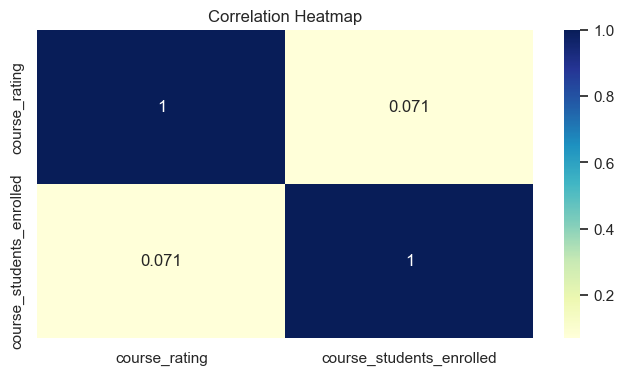

In [186]:
#heatmap of the correlation

corr_matrix = coursera_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')

plt.show()

In [ ]:
# Since at this moment data only has 2 numeric variables and correlation heatmap is too extensive for 1 correlation evaluation

In [187]:
# correlation between ratings and students enrolled
correlation = coursera_df['course_rating'].corr(coursera_df['course_students_enrolled'])
print(f"The correlation between 'course_rating' and 'course_students_enrolled' is {correlation}")

The correlation between 'course_rating' and 'course_students_enrolled' is 0.07109035671526533


Correlation between course rating and number of student enrolled is very week, indicating possibly there no relationship between these 2 variables alone.

## How many courses are possibly about data?

In [188]:
coursera_df['course_title'] = coursera_df['course_title'].str.lower() # converting all letter to be lower 
#for further "data" word lookup

In [189]:
# rows where course title contains word "data"
data_courses = coursera_df[coursera_df['course_title'].str.contains('data')]
data_courses.head(3)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,a crash course in causality: inferring causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,a crash course in data science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
27,advanced data science with ibm,IBM,SPECIALIZATION,4.4,Advanced,320000.0


In [190]:
data_courses.describe(include=['object']).T # exploration of object type features

,count,unique,top,freq
course_title,70,70,a crash course in causality: inferring causal...,1
course_organization,70,27,IBM,12
course_Certificate_type,70,3,COURSE,41
course_difficulty,70,4,Beginner,34


In [191]:
data_courses.describe(include=['float']).T # exploration of object type features

,count,mean,std,min,25%,50%,75%,max
course_rating,70.0,4.605714,0.130646,4.2,4.5,4.6,4.7,4.9
course_students_enrolled,70.0,147194.285714,163061.234062,3000.0,24500.0,110000.0,170000.0,830000.0


Mean of the course ratings calculated from all the available course ratings is 4.68 and courses that are possible are about data have on average 4.6 rating. So they are not that differente on mean aspect, however mean of students enrolled is higher for data courses than for all of the the courses (147194 > 90552). There are 27 unique organizations that offer data related courses. The most data related courses are provided by IBM: 12 different courses. It would interesting to compare descriptive statistics (DS) for data courses and all courses DS excluding data courses.

In [192]:
unique_certif_types = coursera_df['course_Certificate_type'].unique() # checking what unique values certificate feature has
print(unique_certif_types)

['SPECIALIZATION' 'COURSE' 'PROFESSIONAL CERTIFICATE']


In [193]:
unique_diffic_types = coursera_df['course_difficulty'].unique() # checking what unique values difficulty levels feature has
print(unique_diffic_types)

['Beginner' 'Intermediate' 'Mixed' 'Advanced']


## Data exploration with visualization tools

In [194]:
difficulty_students = coursera_df.groupby('course_difficulty')['course_students_enrolled'].sum() #grouping by difficulty levels
difficulty_students

course_difficulty
Advanced         1264400.0
Beginner        39921800.0
Intermediate    14506300.0
Mixed           24989400.0
Name: course_students_enrolled, dtype: float64

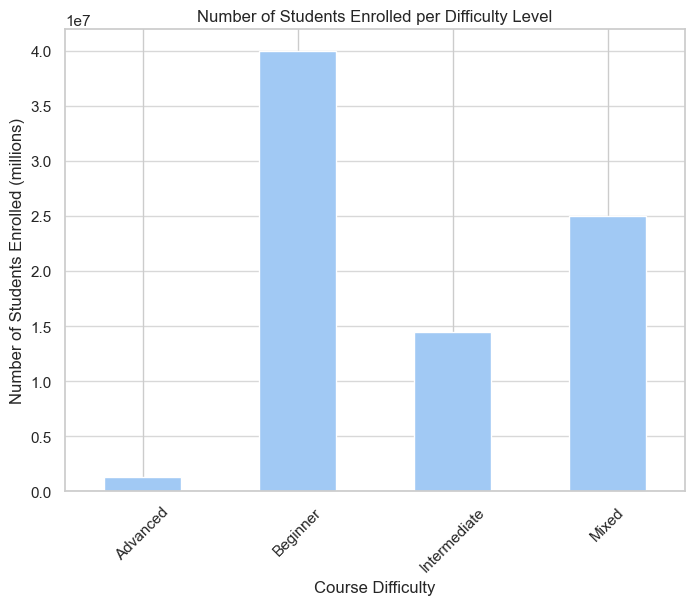

In [195]:
# How many students there are in different difficulty levels?
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
difficulty_students.plot(kind='bar')
plt.title('Number of Students Enrolled per Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Students Enrolled (millions)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45) # using tickets to rotate x-axis labels

plt.show()

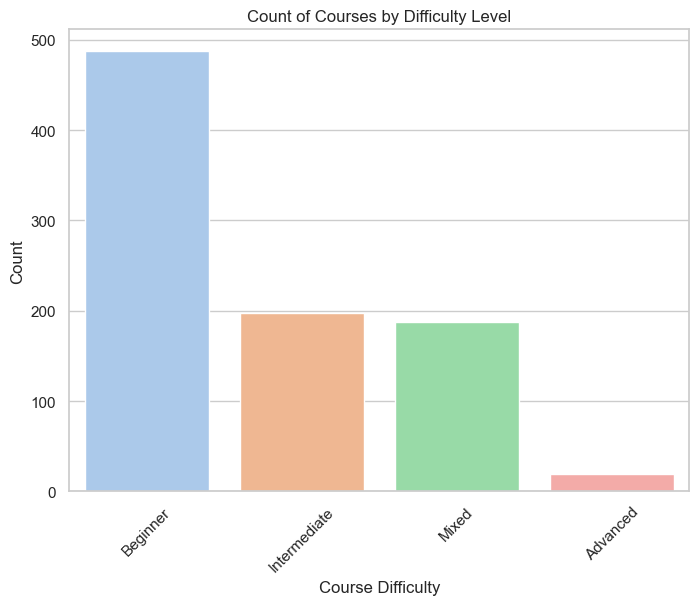

In [196]:
# How does count of courses compare between difficulty?
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6)) 
sns.countplot(x='course_difficulty', data=coursera_df)
plt.title('Count of Courses by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

Since there are quite more courses offered for begiiners it explains why there are so much more students enrolled in the that difficulty level courses. One can make that assumtion. Let's explore that by dividing number of students enrolled in every diffiulty level by number of courses avalable in that difficulty level.

In [197]:
avg_stud_per_difficulty = coursera_df.groupby('course_difficulty')['course_students_enrolled'].mean() #mean of student per diff. level
avg_stud_per_difficulty

course_difficulty
Advanced         66547.368421
Beginner         81974.948665
Intermediate     73264.141414
Mixed           133633.155080
Name: course_students_enrolled, dtype: float64

Mixed difficulty level shows the highest average students per course, even higher than the Beginner level. Making my assumption wrong about more student enrolling to begginer level course because there are more options. Let's see visually how much more with bar chart below.

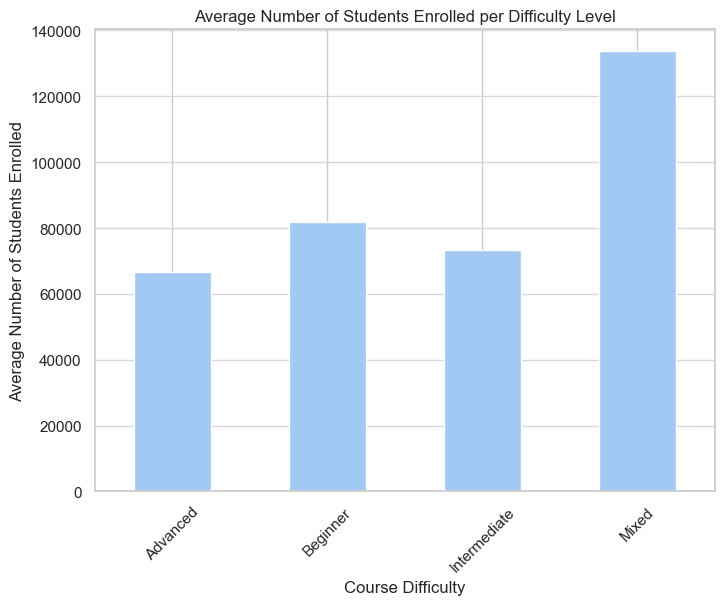

In [198]:
# what is the average number of students enrolled per eifficulty levels
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
avg_stud_per_difficulty.plot(kind='bar')
plt.title('Average Number of Students Enrolled per Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Average Number of Students Enrolled')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)

plt.show()

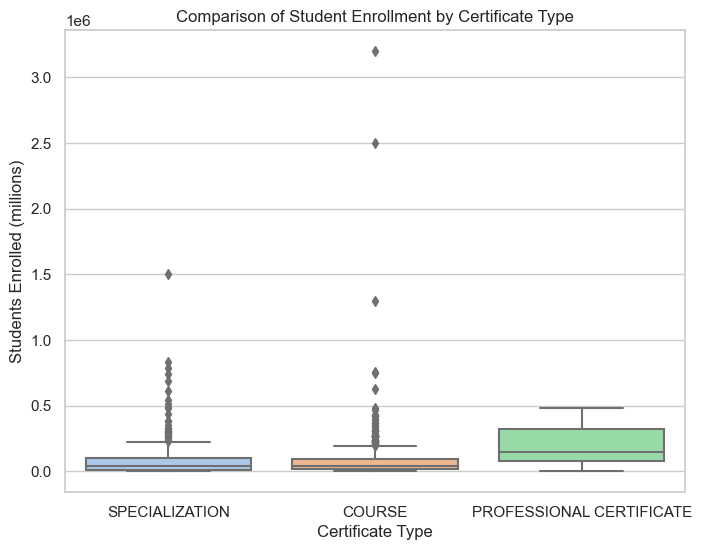

In [199]:
# How does student enrolment compare between certificate type?
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))  
sns.boxplot(x='course_Certificate_type', y='course_students_enrolled', data=coursera_df)
plt.title('Comparison of Student Enrollment by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Students Enrolled (millions)')

# Display the plot
plt.show()

Quite a lot of outliers in Course and Specialization certificate types means that there are quite many courses that have a significantly higher number of enrollments compared to others in their category. There could be many reasons for that topic popularity, organization popularity, accesability or other.

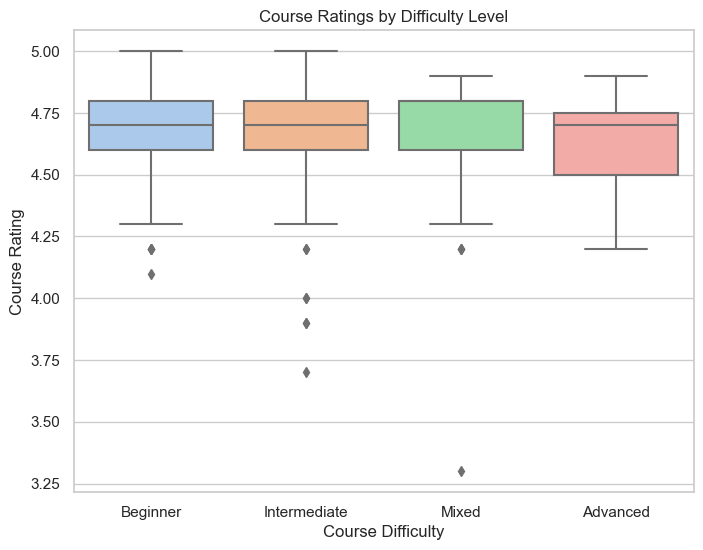

In [200]:
# How does course rating compare between course difficulties?
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6)) 
box_plot = sns.boxplot(x='course_difficulty', y='course_rating', data=coursera_df)
plt.title('Course Ratings by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')

plt.show()

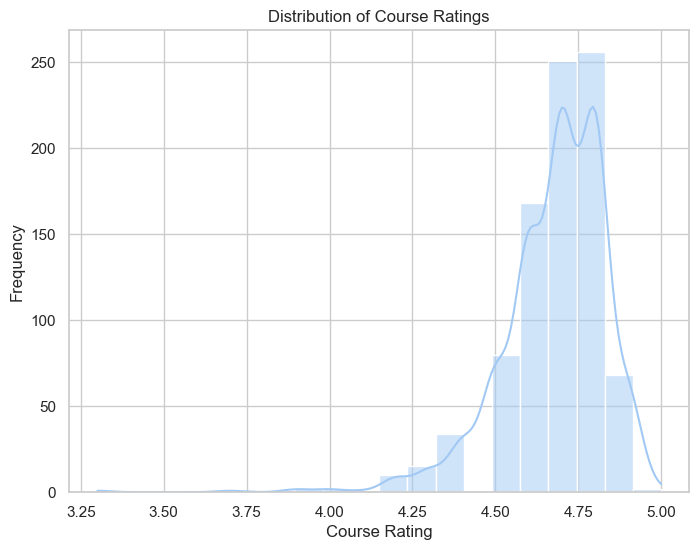

In [201]:
# distribution of course ratings
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
sns.histplot(coursera_df['course_rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')

plt.show()

Course ratings distrubution shows skewed to the left distribution with two peaks around 4.75. As discriptive statistcs showed that most of the courses have high ratings, with fewer courses getting lower ratings. 

## Exploration based on organizations

In [202]:
# data grouped by organization
grouped_by_org = coursera_df.groupby('course_organization')

# new data set that contains the count of courses and total number of students enrolled 
org_stats = pd.DataFrame()
org_stats['num_courses'] = grouped_by_org.size()
org_stats['total_students_enrolled'] = grouped_by_org['course_students_enrolled'].sum()

# adding average course rating for each organization
org_stats['average_course_rating'] = grouped_by_org['course_rating'].mean()

org_stats

,num_courses,total_students_enrolled,average_course_rating
course_organization,,,
(ISC)²,3,9900.0,4.733333
Amazon Web Services,6,364000.0,4.550000
American Institute of Business and Economics,1,11000.0,4.400000
American Museum of Natural History,2,30000.0,4.750000
Arizona State University,7,589500.0,4.771429
...,...,...,...
Yonsei University,4,563000.0,4.750000
deeplearning.ai,16,2863400.0,4.743750
École Polytechnique,1,190000.0,4.800000


In [203]:
org_stats = org_stats.reset_index()  # this resets index to make 'course_organization' back to column

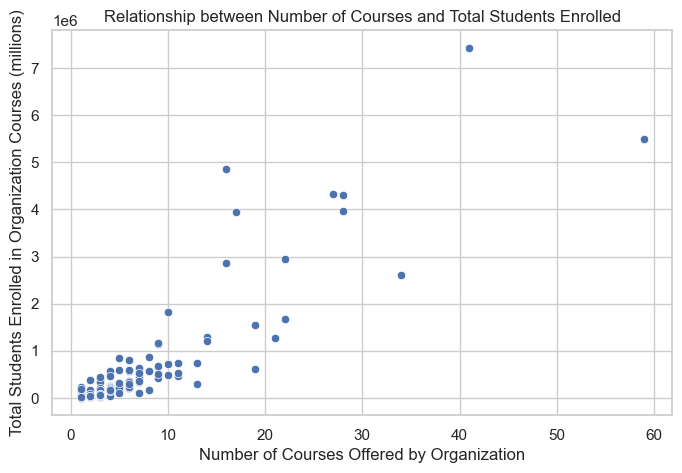

In [204]:
# Is there any relationship between courses available on the organization and number of students enrolled?
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='num_courses', y='total_students_enrolled', data=org_stats)
plt.title('Relationship between Number of Courses and Total Students Enrolled')
plt.xlabel('Number of Courses Offered by Organization')
plt.ylabel('Total Students Enrolled in Organization Courses (millions)')

plt.show()

In [205]:
# correlation of number of courses and students enrolled
correlation = org_stats['num_courses'].corr(org_stats['total_students_enrolled'])
print(f'Correlation between number of courses and total students enrolled: {correlation}')

Correlation between number of courses and total students enrolled: 0.8806787301292277


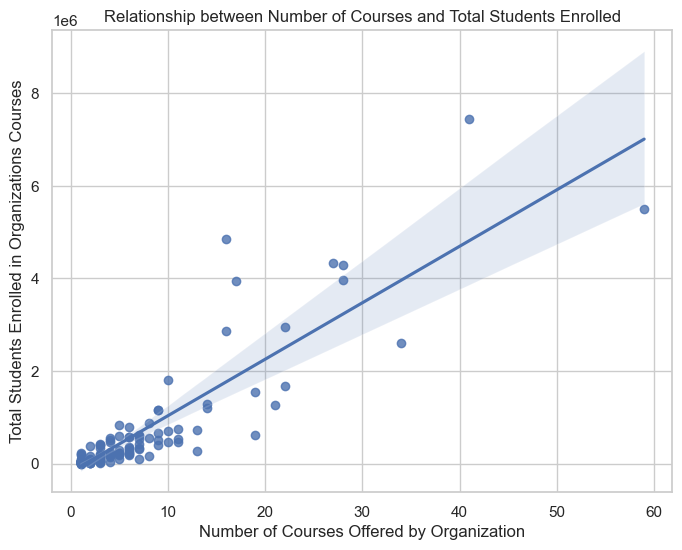

In [206]:
# scatter plot of number of courses and total students per course with regression line to show trend
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(x='num_courses', y='total_students_enrolled', data=org_stats)
plt.title('Relationship between Number of Courses and Total Students Enrolled')
plt.xlabel('Number of Courses Offered by Organization')
plt.ylabel('Total Students Enrolled in Organizations Courses')

plt.show()

It is intuitive that more courses organization provides more students will be enrolled, number of them will accumulate with every course. It makes more sence to look at average number of students enrolled within organization courses.

In [207]:
# correlation between number of courses and average student per course:
org_stats['average_students_per_course'] = org_stats['total_students_enrolled'] / org_stats['num_courses'] #finding average number of student per course
correlation = org_stats['num_courses'].corr(org_stats['average_students_per_course'])
print(f'Correlation between number of courses and average students per course: {correlation}')

Correlation between number of courses and average students per course: 0.41004583082318996


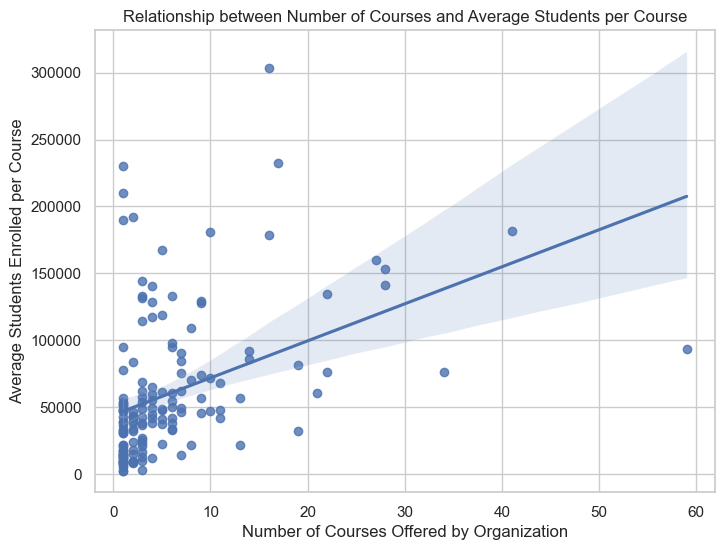

In [208]:
# scatter plot of number of courses and average students per course with regression line to show trend
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(x='num_courses', y='average_students_per_course', data=org_stats)
plt.title('Relationship between Number of Courses and Average Students per Course')
plt.xlabel('Number of Courses Offered by Organization')
plt.ylabel('Average Students Enrolled per Course')

plt.show()

Correlation of 0.41 between the number of courses and average students per course suggests a slight positive relationship. This means that on average organizations that offer more courses tend to have a slightly larger number of students enrolled. However one can assume that other factors probably have more influence to the students enrollment.

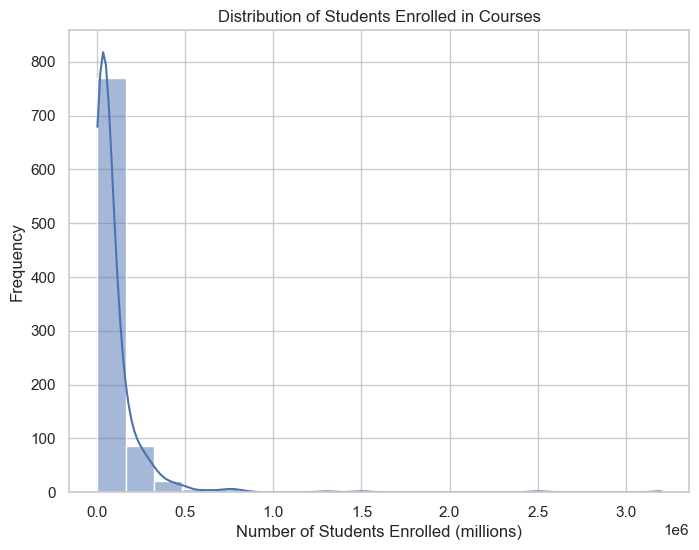

In [210]:
# distribution of students entrolled
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))
sns.histplot(coursera_df['course_students_enrolled'], bins=20, kde=True)
plt.title('Distribution of Students Enrolled in Courses')
plt.xlabel('Number of Students Enrolled (millions)')
plt.ylabel('Frequency')

plt.show()

Distribution of the students enrolled feature is right skewed, that shows that most of the courses have a relatively small number of students enrolled, while only few courses have a very high number of students. 

## Conclusions of the analysis

Relatively high average course rating of 4.68 suggests students find courses usfull and interesting and what they expected, despite the course difficulty or the certificate type that they trying to get. The analysis also revealed that beginner courses are more frequently offered. Interestingly, courses with a "mixed" difficulty level attract the highest average number of enrollments. Another interesting insight is the weak correlation between course rating and student enrollment, indicating that a high rating does not necessarily result in higher enrollments. Finally, despite the variation in the number of courses offered by organizations, a moderate correlation suggests that organizations offering more courses tend to have slightly larger enrollments.